# FOSM - a brief overview (with equations!)

## FOSM = "First Order, Second Moment", which is the mathematical description of what is being described

## FOSM = "linear uncertainty analysis", page 460 in Anderson et al. (2015), PEST parlance

<img src="bayes.png" style="float: left; width: 25%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="jacobi.jpg" style="float: left; width: 25%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="gauss.jpg" style="float: left; width: 22%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="schur.jpg" style="float: left; width: 22%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

## $\underbrace{P(\boldsymbol{\theta}|\textbf{d})}_{\substack{\text{what we} \\ \text{know now}}} \propto \underbrace{\mathcal{L}(\boldsymbol{\theta} | \textbf{d})}_{\substack{\text{what we} \\ \text{learned}}} \underbrace{P(\boldsymbol{\theta})}_{\substack{\text{what we} \\ \text{knew}}} $






## This in a nutshell is the famous Bayes Rule.

### We can also think of this graphically, as taken from Anderson et al. (2015) in slightly different notation but the same equation and concept:

<img src="AW&H2015.png" style="float: right">

<img src="Fig10.3_Bayes_figure.png" style="float: center">

## The problem is for real-world problems, the likelihood function  $\mathcal{L}(\theta | \textbf{D})$ is high-dimensional and non-parameteric, requiring non-linear (typically Monte Carlo) integration for rigorous Bayes

## But, we can make some assumptions and greatly reduce computational burden. This is why we often suggest using these linear methods first before burning the silicon on the non-linear ones like Monte Carlo.  

## How do we reduced the computational burden?  By using these shortcuts:

## 0.) an approximate linear relation between pars and obs  

<img src="jacobi.jpg" style="float: left; width: 15%; margin-right: 1%; margin-bottom: 0.5em;">

##     <center> $\mathbf{J} \approx \text{constant}$, $\frac{\partial\text{obs}}{\partial\text{par}} \approx \text{constant}$</center>

## 1.) The parameter and forecast prior and posterior distributions are approximately Gaussian

<img src="gauss.jpg" style="float: left; width: 10%; margin-right: 1%; margin-bottom: 0.5em;">

##  <center>  $ P(\boldsymbol{\theta}|\mathbf{d}) \approx \mathcal{N}(\overline{\boldsymbol{\mu}}_{\boldsymbol{\theta}},\overline{\boldsymbol{\Sigma}}_{\boldsymbol{\theta}})$ </center>

## Armed with these two assumptions, from Bayes equations, one can derive the Schur complement for conditional uncertainty propogation:
<img src="schur.jpg" style="float: left; width: 10%; margin-right: 1%; margin-bottom: 0.5em;">

## <center> $\underbrace{\overline{\boldsymbol{\Sigma}}_{\boldsymbol{\theta}}}_{\substack{\text{what we} \\ \text{know now}}} = \underbrace{\boldsymbol{\Sigma}_{\boldsymbol{\theta}}}_{\substack{\text{what we} \\ \text{knew}}} - \underbrace{\boldsymbol{\Sigma}_{\boldsymbol{\theta}}\bf{J}^T\left[\bf{J}\boldsymbol{\Sigma}_{\boldsymbol{\theta}}\bf{J}^T + \boldsymbol{\Sigma}_{\boldsymbol{\epsilon}}\right]^{-1}\bf{J}\boldsymbol{\Sigma}_{\boldsymbol{\theta}}}_{\text{what we learned}}$ </center>

## some remarks:
## 0.) no parameter values or observation values
## 1.) "us + data" = $\overline{\Sigma}_{\theta}$; "us" = $\Sigma_{\theta}$
## 2.) the '-' on the RHS shows that we are (hopefully) collapsing the probability manifold in parameter space by "learning" from the data. Or put another way, we are subtracting from the uncertainty we started with (we started with the Prior uncertainty)
## 3.) uncertainty in our measurements of the world is encapsulated in $\Sigma_{\epsilon}$. If the "observations" are highly uncertain, then parameter "learning" decreases because $\Sigma_{\epsilon}$ is in the denominator. Put another way, if our measured data are made (assumed) to be accurate and precise, then uncertainty associated with the parameters that are constrained by these measured data is reduced - we "learn" more. 
## 4.) what quantities are needed? $\bf{J}$, $\boldsymbol{\Sigma}_{\theta}$, and $\boldsymbol{\Sigma}_{\epsilon}$
## 5.) the diagonal of $\Sigma_{\theta}$ and $\overline{\Sigma}_{\theta}$ are the Prior and Posterior uncertainty (variance) of each adjustable parameter

# But what about forecasts? We can use the same assumptions:
<img src="jacobi.jpg" style="float: left; width: 15%; margin-right: 1%; margin-bottom: 0.5em;">
<img src="gauss.jpg" style="float: left; width: 12%; margin-right: 1%; margin-bottom: 0.5em;">
<p style="clear: both;">

## prior forecast uncertainty (variance): $\sigma^2_{s} = \mathbf{y}^T\boldsymbol{\Sigma}_{\boldsymbol{\theta}}\mathbf{y}$
## posterior forecast uncertainty (variance): $\overline{\sigma}^2_{s} = \mathbf{y}^T\overline{\boldsymbol{\Sigma}}_{\boldsymbol{\theta}}\mathbf{y}$
## some remarks:

## - no parameter values or forecast values
## - what's needed? $\bf{y}$, which is the *sensitivity of a given forecast* to each adjustable parameter. Each forecast will have its own $\bf{y}$
## -   How do I get $\bf{y}$? the easiest way is to include your forecast(s) as an observation in the control file - then we get the $\bf{y}$'s for free during the parameter estimation process.

## Mechanics of calculating FOSM parameter and forecast uncertainty estimates

### in the PEST world:
<img src="workflow.png" style="float: left; width: 50%; margin-right: 1%; margin-bottom: 0.5em;">



## in PEST++

<img src="workflow++.png" style="float: left; width: 50%; margin-right: 1%; margin-bottom: 0.5em;">


# Hands on:  Demystifying matrices and vectors used in FOSM

Pages 461-465 of Anderson et al. use the PREDUNC equation of PEST to discuss an applied view of FOSM, what goes into it, and what it means in practice.  Here we will look more closely at these.  The objective is to get a better feel for what is going on under the hood in linear uncertainty analyses. 

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemu



flopy is installed in /Users/jwhite/Dev/flopy/flopy


# Let's check out the files that pestpp-glm created

### Let's look at the parameter uncertainty summary written by pestpp:

In [2]:
if os.path.exists(os.path.join('..','master_glm','freyberg_pp.par.usum.csv')):
    df = pd.read_csv(os.path.join('..','master_glm','freyberg_pp.par.usum.csv'),index_col=0)
else:
    df = pd.read_csv(os.path.join('pstfiles','freyberg_pp.par.usum.csv'),index_col=0)
df


,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
name,,,,,,,,
CONST_RECH10__CN,0,0.067211,-0.134423,0.134423,0,0.067170,-0.134339,0.134339
CONST_RECH11__CN,0,0.067211,-0.134423,0.134423,0,0.067136,-0.134273,0.134273
CONST_RECH12__CN,0,0.067211,-0.134423,0.134423,0,0.066973,-0.133946,0.133946
CONST_RECH13__CN,0,0.067211,-0.134423,0.134423,0,0.066548,-0.133097,0.133097
CONST_RECH14__CN,0,0.067211,-0.134423,0.134423,0,0.065646,-0.131292,0.131292
...,...,...,...,...,...,...,...,...
WELFLUX_020,0,0.500000,-1.000000,1.000000,0,0.222134,-0.444268,0.444268
WELFLUX_021,0,0.500000,-1.000000,1.000000,0,0.238821,-0.477642,0.477642
WELFLUX_022,0,0.500000,-1.000000,1.000000,0,0.274465,-0.548931,0.548931


In [3]:
df.loc['CONST_RECH14__CN'].to_frame().T

,prior_mean,prior_stdev,prior_lower_bound,prior_upper_bound,post_mean,post_stdev,post_lower_bound,post_upper_bound
CONST_RECH14__CN,0.0,0.067211,-0.134423,0.134423,0.0,0.065646,-0.131292,0.131292


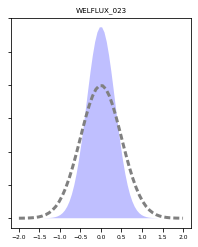

In [4]:
axes = pyemu.plot_utils.plot_summary_distributions(df.loc['WELFLUX_023'].to_frame().T,subplots=True)

### There is a similar file for forecasts:

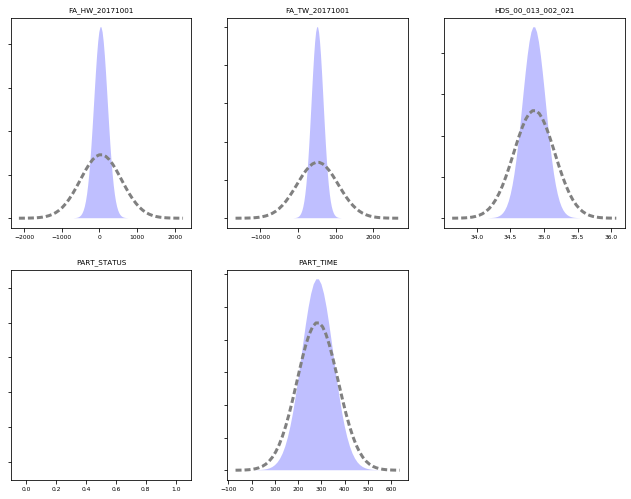

In [5]:
if os.path.exists(os.path.join('..','master_glm','freyberg_pp.pred.usum.csv')):
    axes = pyemu.plot_utils.plot_summary_distributions(os.path.join('..','master_glm','freyberg_pp.pred.usum.csv'),subplots=True)
else:
    axes = pyemu.plot_utils.plot_summary_distributions(os.path.join('pstfiles','freyberg_pp.pred.usum.csv'),subplots=True)

### So that's cool!  Questions:
### - where do the prior parameter distro's come from?
### - where do the prior forecast distro's come from?
### - why are are the posterior distro's differenent than the priors?

## but pyemu does the same calculations, but also allows you to do other, more exciting things...

# FOSM with pyEMU

### The ``Schur`` object is one of the primary object for FOSM in pyEMU and the only one we will talk about in this class

In [6]:
if os.path.exists(os.path.join('..','master_glm','freyberg_pp.jcb')):
    sc = pyemu.Schur(os.path.join('..','master_glm','freyberg_pp.jcb'),verbose=True)
else:
    sc = pyemu.Schur(os.path.join('pstfiles','freyberg_pp.jcb'),verbose=True)


2020-02-20 15:30:07.079610 starting: pre-loading base components
2020-02-20 15:30:07.079723 starting: loading jco: ../master_glm/freyberg_pp.jcb
2020-02-20 15:30:07.141788 finished: loading jco: ../master_glm/freyberg_pp.jcb took: 0:00:00.062065
2020-02-20 15:30:07.141868 starting: loading pst: ../master_glm/freyberg_pp.pst
2020-02-20 15:30:07.309339 finished: loading pst: ../master_glm/freyberg_pp.pst took: 0:00:00.167471
2020-02-20 15:30:07.309412 starting: loading parcov
2020-02-20 15:30:08.373039 finished: loading parcov took: 0:00:01.063627
2020-02-20 15:30:08.373105 starting: loading obscov
2020-02-20 15:30:08.532451 finished: loading obscov took: 0:00:00.159346
2020-02-20 15:30:08.532527 starting: loading forecasts
2020-02-20 15:30:08.563080 finished: loading forecasts took: 0:00:00.030553
2020-02-20 15:30:08.563151 forecast names: fa_hw_20171001,fa_tw_20171001,hds_00_013_002_021,part_time,part_status
2020-02-20 15:30:08.563236 finished: pre-loading base components took: 0:00:01

### Now that seemed too easy, right?  Well, underhood the ``Schur`` object found the control file ("freyberg_zn.pst") and used it to build the prior parameter covariance matrix, $\boldsymbol{\Sigma}_{\theta}$, from the parameter bounds and the observation noise covariance matrix ($\boldsymbol{\Sigma}_{\epsilon}$) from the observation weights.  These are the ``Schur.parcov`` and ``Schur.obscov`` attributes.  

### The ``Schur`` object also found the "++forecasts()" optional pestpp argument in the control, found the associated rows in the Jacobian matrix file and extracted those rows to serve as forecast sensitivity vectors:

In [7]:
sc.pst.pestpp_options

{'forecasts': 'fa_hw_20171001,fa_tw_20171001,hds_00_013_002_021,part_time,part_status'}

### Recall that a Jacobian matrix looks at the changes in observations as a parameter is changed.  Therefore the Jacobian matrix has parameters in the columns and observations in the rows.  The bulk of the matrix is made up of the difference in  observations between a base run and a run where the parameter at the column head was perturbed (typically 1% from the base run value - controlled by the "parameter groups" info).  Now we'll plot out the Jacobian matrix from the fryberg_zones activity:

In [8]:
sc.jco.to_dataframe().loc[sc.pst.nnz_obs_names,:]

,const_rech10__cn,const_rech11__cn,const_rech12__cn,const_rech13__cn,const_rech14__cn,const_rech15__cn,const_rech16__cn,const_rech17__cn,const_rech18__cn,const_rech19__cn,...,welflux_015,welflux_016,welflux_017,welflux_018,welflux_019,welflux_020,welflux_021,welflux_022,welflux_023,welflux_024
fo_gage_1_20160101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160401,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160501,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trgw_034_010_20170901,0.004165,0.007174,0.015042,0.026612,0.045125,0.065257,0.076827,0.095340,0.094414,0.088398,...,-0.028232,-0.059009,-0.119175,-0.206416,-0.349889,-0.629892,0.000000,0.000000,0.000000,0.000000
trgw_034_010_20171001,0.003934,0.006942,0.012727,0.021521,0.036562,0.052530,0.060166,0.075439,0.074513,0.068265,...,-0.020827,-0.043967,-0.087935,-0.149721,-0.241590,-0.354054,-0.550751,0.000000,0.000000,0.000000
trgw_034_010_20171101,0.002314,0.004628,0.009719,0.016893,0.028232,0.040728,0.047670,0.058315,0.057852,0.053224,...,-0.016199,-0.032397,-0.064794,-0.109456,-0.172862,-0.241821,-0.303144,-0.441295,0.000000,0.000000
trgw_034_010_20171201,0.001620,0.003471,0.006942,0.013190,0.021984,0.031703,0.037025,0.044893,0.043967,0.040496,...,-0.013422,-0.025455,-0.050447,-0.083307,-0.128894,-0.175870,-0.210581,-0.247606,-0.300830,0.000000


### This reports changes in observations to a change in a parameter.  We can report how  forecasts of interests change as the parameter is perturbed.  Note pyemu extracted the forecast rows from the Jacobian on instantiation:

In [9]:
sc.forecasts.to_dataframe()

,fa_hw_20171001,fa_tw_20171001,hds_00_013_002_021,part_time,part_status
const_rech10__cn,-5.067833,-5.322382,0.010593,0.231408,0.0
const_rech11__cn,-7.474475,-8.562092,0.017655,-0.161986,0.0
const_rech12__cn,-16.383679,-18.281224,0.036193,0.000000,0.0
const_rech13__cn,-28.069777,-33.554144,0.063558,0.000000,0.0
const_rech14__cn,-47.392336,-57.157749,0.105047,0.000000,0.0
...,...,...,...,...,...
welflux_020,539.365516,591.015758,-0.147419,0.000000,0.0
welflux_021,809.279682,728.703454,-0.063558,0.000000,0.0
welflux_022,0.000000,0.000000,0.000000,0.000000,0.0
welflux_023,0.000000,0.000000,0.000000,0.000000,0.0


### Each of these columns in a $\bf{y}$ vector used in the FOSM calculations...that's it!


### But the forecasts also have uncertainty because we have inherent uncertainty in the parameters.  Here's what we have defined for parameter uncertainty - the Prior.  It was constructed on-the-fly from the parameter bounds in the control file: 

In [10]:
sc.parcov.to_dataframe()

,const_rech10__cn,const_rech11__cn,const_rech12__cn,const_rech13__cn,const_rech14__cn,const_rech15__cn,const_rech16__cn,const_rech17__cn,const_rech18__cn,const_rech19__cn,...,welflux_015,welflux_016,welflux_017,welflux_018,welflux_019,welflux_020,welflux_021,welflux_022,welflux_023,welflux_024
const_rech10__cn,0.004517,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
const_rech11__cn,0.000000,0.004517,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
const_rech12__cn,0.000000,0.000000,0.004517,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
const_rech13__cn,0.000000,0.000000,0.000000,0.004517,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
const_rech14__cn,0.000000,0.000000,0.000000,0.000000,0.004517,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
welflux_020,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.25,0.00,0.00,0.00,0.00
welflux_021,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.25,0.00,0.00,0.00
welflux_022,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.25,0.00,0.00
welflux_023,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.25,0.00


### Page 463-464 in Anderson et al. (2015) spends some time on what is shown above.  For our purposes, a diagonal Prior -  numbers only along the diagaonal - shows that we expect the uncertainty for each parameter to only results from itself - there is no covariance with other parameters. The numbers themselves reflect "the innate parameter variability", and is input into the maths as a standard deviation around the parameter value.  This is called the "C(p) matrix of innate parameter variability" in the PEST parlance.

## IMPORTANT POINT:  Again, how did PEST++ and pyEMU get these standard deviations shown in the diagonal?  From the *parameter bounds* that were specified for each parameter in the PEST control file.

### On page 462-463 in Anderson et al. they also point out that a forecast uncertainty has to take into account the noise/uncertainty in the observations.   Similar to the parameter Prior - the $\Sigma_{\theta}$ matrix -, it is a covariance matrix of measurement error associated with the observations.  This is the same as  $\Sigma_{\epsilon}$ that we discussed above. For our Fryberg problem, say each observation had a standard devation of 1 around the observed value.  The $C{\epsilon}$ matrix would look like:

In [11]:
sc.obscov.to_dataframe().loc[sc.pst.nnz_obs_names,sc.pst.nnz_obs_names]

,fo_gage_1_20160101,fo_gage_1_20160201,fo_gage_1_20160301,fo_gage_1_20160401,fo_gage_1_20160501,fo_gage_1_20160601,fo_gage_1_20160701,fo_gage_1_20160801,fo_gage_1_20160901,fo_gage_1_20161001,...,trgw_034_010_20170401,trgw_034_010_20170501,trgw_034_010_20170601,trgw_034_010_20170701,trgw_034_010_20170801,trgw_034_010_20170901,trgw_034_010_20171001,trgw_034_010_20171101,trgw_034_010_20171201,trgw_034_010_20180101
fo_gage_1_20160101,444444.444444,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160201,0.000000,444444.444444,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160301,0.000000,0.000000,444444.444444,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160401,0.000000,0.000000,0.000000,444444.444444,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
fo_gage_1_20160501,0.000000,0.000000,0.000000,0.000000,444444.444444,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trgw_034_010_20170901,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.111111,0.000000,0.000000,0.000000,0.000000
trgw_034_010_20171001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.111111,0.000000,0.000000,0.000000
trgw_034_010_20171101,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.111111,0.000000,0.000000
trgw_034_010_20171201,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.111111,0.000000


### IMPORTANT POINT:  How did PEST++ and pyEMU get these standard deviations shown in the diagonal?  From the *weights* that were specified for each observation in the PEST control file.

### IMPORTANT POINT: You can use FOSM in the "pre-calibration" state to design an objective function (e.g. weights) to maximize forecast uncertainty reduction.

### IMPORTANT POINT: In PEST++, if a given observation has a larger-than-expected residual, the variance of said observation is reset to the variance implied by the residual.  That is, the diagonal elements of $\Sigma_{\epsilon}$ are reset according to the residuals

### Okay, enough emphasis.  Here's the point.  When we apply FOSM using these matrices above we can see how our uncertainty changes during calibration, first for parameters and then for forecasts:

2020-02-20 15:30:19.915043 starting: Schur's complement
2020-02-20 15:30:19.915934 starting: xtqx
2020-02-20 15:30:20.014183 finished: xtqx took: 0:00:00.098249
2020-02-20 15:30:20.036369 finished: Schur's complement took: 0:00:00.121326


,prior_var,post_var,percent_reduction
const_rech10__cn,0.004517,0.004507,0.235031
const_rech11__cn,0.004517,0.004496,0.463061
const_rech12__cn,0.004517,0.004462,1.233204
const_rech13__cn,0.004517,0.004387,2.877209
const_rech14__cn,0.004517,0.004242,6.089476
...,...,...,...
welflux_020,0.250000,0.035688,85.724815
welflux_021,0.250000,0.044365,82.254179
welflux_022,0.250000,0.060495,75.801886
welflux_023,0.250000,0.101070,59.571850


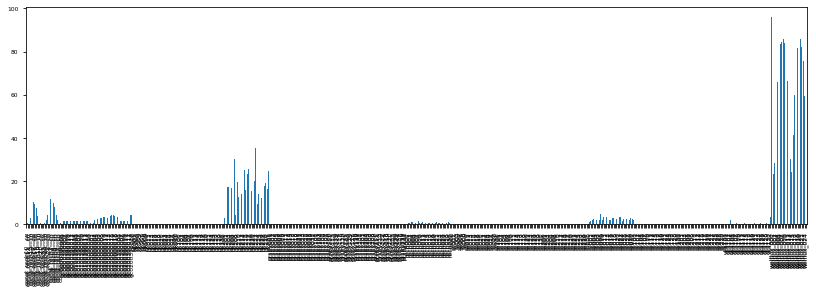

In [12]:
df = sc.get_parameter_summary()
df.percent_reduction.plot(kind="bar", figsize=(14,4))
df

### Do these results make sense?  Why is ``rch_1`` unaffected by calibration?

###  Where did the "prior_var" and "post_var" columns come from?

In [13]:
sc.get_forecast_summary()

2020-02-20 15:30:23.688638 starting: propagating prior to predictions
2020-02-20 15:30:23.692345 finished: propagating prior to predictions took: 0:00:00.003707
2020-02-20 15:30:23.693038 starting: propagating posterior to predictions
2020-02-20 15:30:23.695278 finished: propagating posterior to predictions took: 0:00:00.002240


,prior_var,post_var,percent_reduction
fa_hw_20171001,297451.118378,23843.448783,91.984078
fa_tw_20171001,296808.023416,19329.433101,93.487564
hds_00_013_002_021,0.093174,0.018984,79.624794
part_time,7779.388530,3888.750716,50.012129
part_status,0.000000,0.000000,NaN


### Do these results make sense?  Remember, these are not the "calibrated" forecast values, these are the prior (before calibration) and posterior (after calibration) forecast uncertainties...